# Clasification

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

(300, 2) (300,) (240, 2) (60, 2) (240,) (60,)


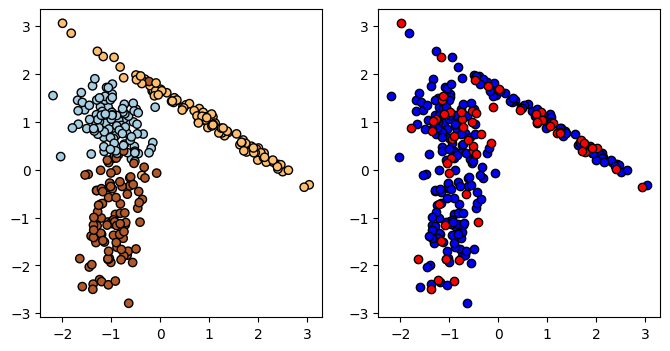

In [2]:
# we create 100 separable points
X, y = make_classification(n_samples = 300, n_features=2, n_classes = 3,
                           n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Plot train / test data
_, axes = plt.subplots(1,2, figsize = (8,4))
axes[0].scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='Paired')
axes[1].scatter(X_train[:,0], X_train[:,1], c='b', edgecolors='k')
axes[1].scatter(X_test[:,0], X_test[:,1], c='r', edgecolors='k')

In [4]:
def decisionBoundaries(model, X, num=100):
  import numpy as np
  offset=0.2
  x_min, x_max = X[:, 0].min() - offset, X[:, 0].max() + offset
  y_min, y_max = X[:, 1].min() - offset, X[:, 1].max() + offset
  x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, num), np.linspace(y_min, y_max, num))

  # Calcular las predicciones del modelo para la malla
  Z = model.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
  Z = Z.reshape(x_grid.shape)

  return x_grid, y_grid, Z

In [ ]:
# import sys
# sys.path.append('/ruta/')
# from carpeta.archivo import funcion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
models = [ kNN(n_neighbors=5, metric='euclidean'),
           LogisticRegression(),
           SVC(kernel='poly', C=2),
           SVC(kernel='rbf', C=2)]

names = ['kNN (k=5)', 'Log Regression', 'SVM (poly)', 'SVM (rbf)']

_, axes = plt.subplots(1,4, figsize = (20,5))
preds = {}

# fit the models
# for i, model in enumerate(models):
#     model.fit(X_train, y_train)
#     preds[models[i]] = model.predict(X_test)
#     # Plot everything
#     plot_DB(model = model, X = X_test, ax = axes[i], title = names[i])

# plt.show()
for i, model in enumerate(models) :
    #
    #clf = _
    model.fit(X_train,y_train )
    preds[names[i]] = model.predict(X_test)

    # Plot decision boundaries
    x_grid, y_grid, Z = decisionBoundaries(model, X_train)  # Obtener x_grid, y_grid, Z
    axes[i].contourf(x_grid, y_grid, Z, cmap="viridis") # Visualizar las fronteras de decisión

    # Plot train/test points
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="Dark2", edgecolors='k')

    axes[i].set_title(names[i])

plt.show()

In [ ]:
print(X_test.shape, y_test.shape)

(60, 2) (60,)


## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

########----- Results for kNN (k=5) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.950  	   0.950  	   0.950  	   0.950  	
########----- Results for Log Regression -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.933  	   0.933  	   0.933  	   0.933  	
########----- Results for SVM (poly) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.900  	   0.900  	   0.900  	   0.900  	
########----- Results for SVM (rbf) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.967  	   0.967  	   0.967  	   0.967  	


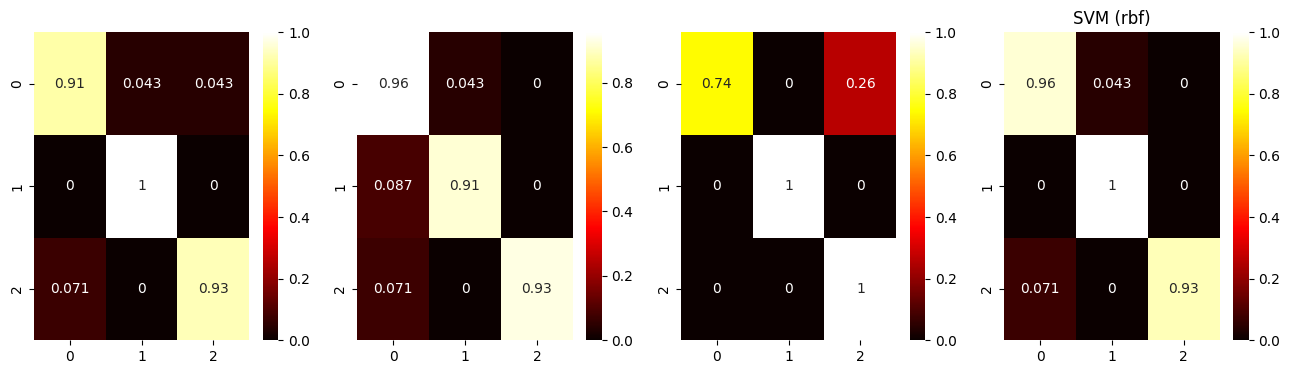

In [ ]:
_, axes = plt.subplots(1, 4, figsize = (16,4))

# Compute metrics - plot confusion matrix
for name, ax in zip(names, axes):
  print ("########----- Results for {0} -----########".format( name))
  accuracy = accuracy_score( y_test, preds[name])
  precision = precision_score( y_test, preds[name], average = "micro")
  recall = recall_score( y_test, preds[name], average = "micro")
  f1 = f1_score( y_test, preds[name], average = "micro")
  cm = confusion_matrix( y_test, preds[name], normalize='true')
  ##--------------
  print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t   {3:.3f}  \t".format(accuracy, precision, recall, f1))
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax)
  axes[i].set_title( name)

In [ ]:
for model, name in zip(models, names):
  metrics = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')
  print('Classif scores for model: {0}'.format(name))
  print(metrics)
  print('Avg score: {0}'.format(np.mean(metrics)))
  print('------------------------------------------------')

Classif scores for model: kNN (k=5)
[0.89583333 0.95833333 1.         0.97916667 0.97916667]
Avg score: 0.9625
------------------------------------------------
Classif scores for model: Log Regression
[0.95833333 0.95833333 0.97916667 0.91666667 0.95833333]
Avg score: 0.9541666666666666
------------------------------------------------
Classif scores for model: SVM (poly)
[0.95833333 0.95833333 0.95833333 0.9375     0.95833333]
Avg score: 0.9541666666666666
------------------------------------------------
Classif scores for model: SVM (rbf)
[0.95833333 0.97916667 0.97916667 0.9375     0.95833333]
Avg score: 0.9625
------------------------------------------------


## En datos reales

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

(1797, 64)


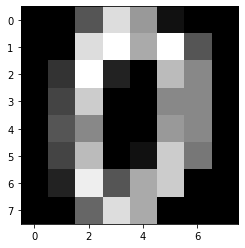

In [ ]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[0].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

# Regression

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression

# Import validation
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_regression(n_samples = 1000, n_features = _ , noise = _ , random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


np.random.seed(0)
y_test = y_test + np.random.normal(len(y_test)) * 0.1

# Plot train / test data
_

In [ ]:
# Train a linear regression



## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Compute MAE and MSE